# Imports

In [24]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import numpy as np

# Helpers

In [25]:
def select_top_performances(df):
    prediction_type = ""
    embedding_based = "-2"
    performance_measure = ""
    
    important_rows = []
    df_reverse = df.iloc[::-1]
    for _,row in df_reverse.iterrows():
        if row['Embedding based'] == -1 or row['Embedding based'] == 2 or row['Embedding based'] != embedding_based or row['Prediction type'] != prediction_type or row['Performance Measure'] != performance_measure:
            if row['Embedding based'] == "-1":
                performance = row['Performance']
                if performance < 5:
                    continue
            important_rows.append(row)
            print(row)
        prediction_type = row['Prediction type']
        embedding_based = row['Embedding based']
        performance_measure = row['Performance Measure']
    return pandas.DataFrame(important_rows)

In [26]:
legend_EB_EI = mpatches.Patch(color="#003f5c", label='Embedding + EI')
legend_EB = mpatches.Patch(color="#32698c", label='Embedding based')
legend_EI = mpatches.Patch(color='#5b96bf', label='Evolutionary Information (EI)')
legend_Random = mpatches.Patch(color='#85c5f5', label='Random Baseline')

In [27]:
def color_assignment(embedding_based_list):
    return ['#5b96bf' if int(entry)==0 else ("#32698c" if int(entry)==1 else "#003f5c" if int(entry)==2 else '#85c5f5') for entry in embedding_based_list]

# Plot embedding performances

In [28]:
df_performance = pandas.read_csv('performance_test.csv', sep=";")
df_performance

,Model,Q3,SE Q3,CI Q3,Reproduced?
0,SeqVec raw,71.6,0.5,0.9,1
1,SeqVec MSA,77.7,0.6,1.0,0
2,SeqVec MSACons,75.9,0.4,0.7,0
3,SeqVec PSSMConcat,75.2,0.4,0.7,1
4,SeqVec PSSMSplit,74.5,0.5,0.9,1
5,ProtBert raw,80.9,0.4,0.7,1
6,ProtBert MSA,81.7,0.4,0.7,1
7,ProtBert MSACons,80.8,0.4,0.7,1
8,ProtBert PSSMConcat,80.5,0.4,0.7,1
9,ProtBert PSSMSplit,80.9,0.4,0.7,1


In [29]:
labels = df_performance['Model']
q3 = df_performance['Q3']
se = df_performance['SE Q3']
ci = df_performance['CI Q3']
majority_class_performance = df_performance['Q3'][16]
difference_to_random = [entry - majority_class_performance for entry in q3]

## Plot horizontally

In [30]:
y_pos = np.arange(len(labels))

seperator_seqvec = y_pos[4] + (y_pos[5] - y_pos[4])/2
seperator_bert = y_pos[9] + (y_pos[10] - y_pos[9])/2
seperator_t5 = y_pos[14] + (y_pos[15] - y_pos[14])/2

Plot Q3 only

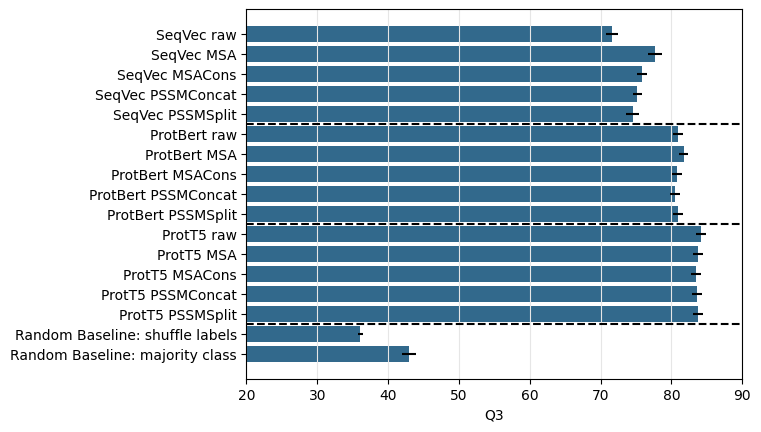

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, q3, xerr=ci, align='center', color="#32698c")
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([20, 90])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Without baselines

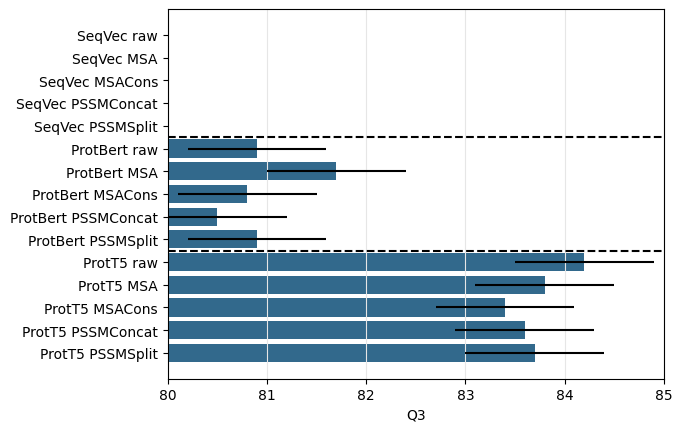

In [32]:
y_pos_no_baseline = np.arange(len(labels[:15]))
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos_no_baseline, q3[:15], xerr=ci[:15], align='center', color="#32698c")
ax.set_yticks(y_pos_no_baseline, labels=labels[:15])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([80, 85])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Plot difference to majority class prediction

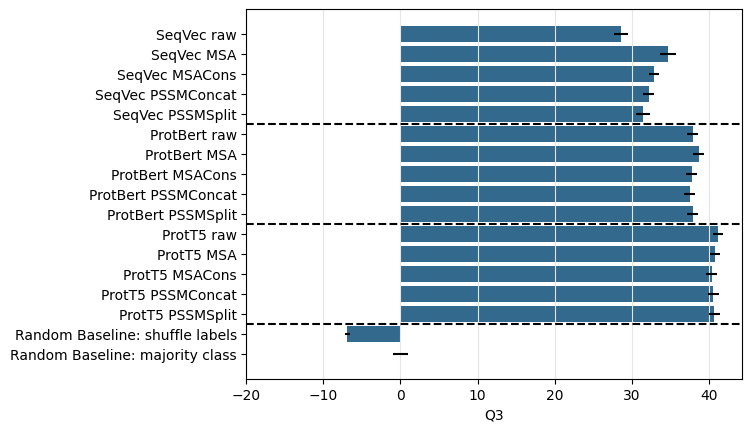

In [33]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, difference_to_random, xerr=ci, align='center', color="#32698c")
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim(left=-20)
# ax.bar_label(bars) IndexError

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

## Plot vertically

In [34]:
x_pos = np.arange(len(labels))

seperator_seqvec = x_pos[4] + (x_pos[5] - x_pos[4])/2
seperator_bert = x_pos[9] + (x_pos[10] - x_pos[9])/2
seperator_t5 = x_pos[14] + (x_pos[15] - x_pos[14])/2
x_labels = [label.replace('SeqVec ', '').replace('ProtBert ', '').replace('ProtT5 ', '').replace('Random Baseline: ', '') for label in labels]

Plot Q3 only

C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1060669466.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=90, ha='center')


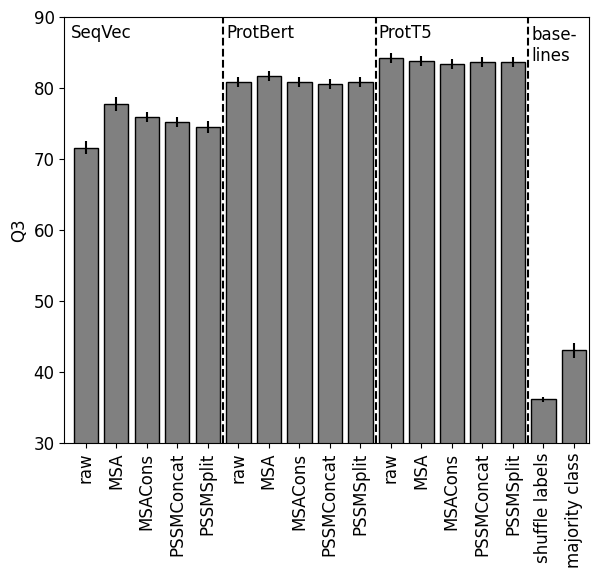

In [47]:
plt.rcParams['font.size'] = '12'
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot2grid((15, 30), (0, 0), colspan=17, rowspan=7)
#plt.grid(axis='y', color='0.9')

ax.bar(labels, q3, yerr=ci, color="gray", width=0.8, edgecolor="black")
ax.set_ylim([30, 90])
ax.set_xlim([-0.7, 16.5])
ax.set_xticklabels(x_labels, rotation=90, ha='center')
ax.set_ylabel('Q3')


plt.annotate('SeqVec',xy=(-0.5, 87))
plt.annotate('ProtBert',xy=(4.6, 87))
plt.annotate('ProtT5',xy=(9.6, 87))
plt.annotate('base-\nlines',xy=(14.6, 83.85))
plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')


plt.show()

Plot difference to majority class prediction

C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1331637293.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


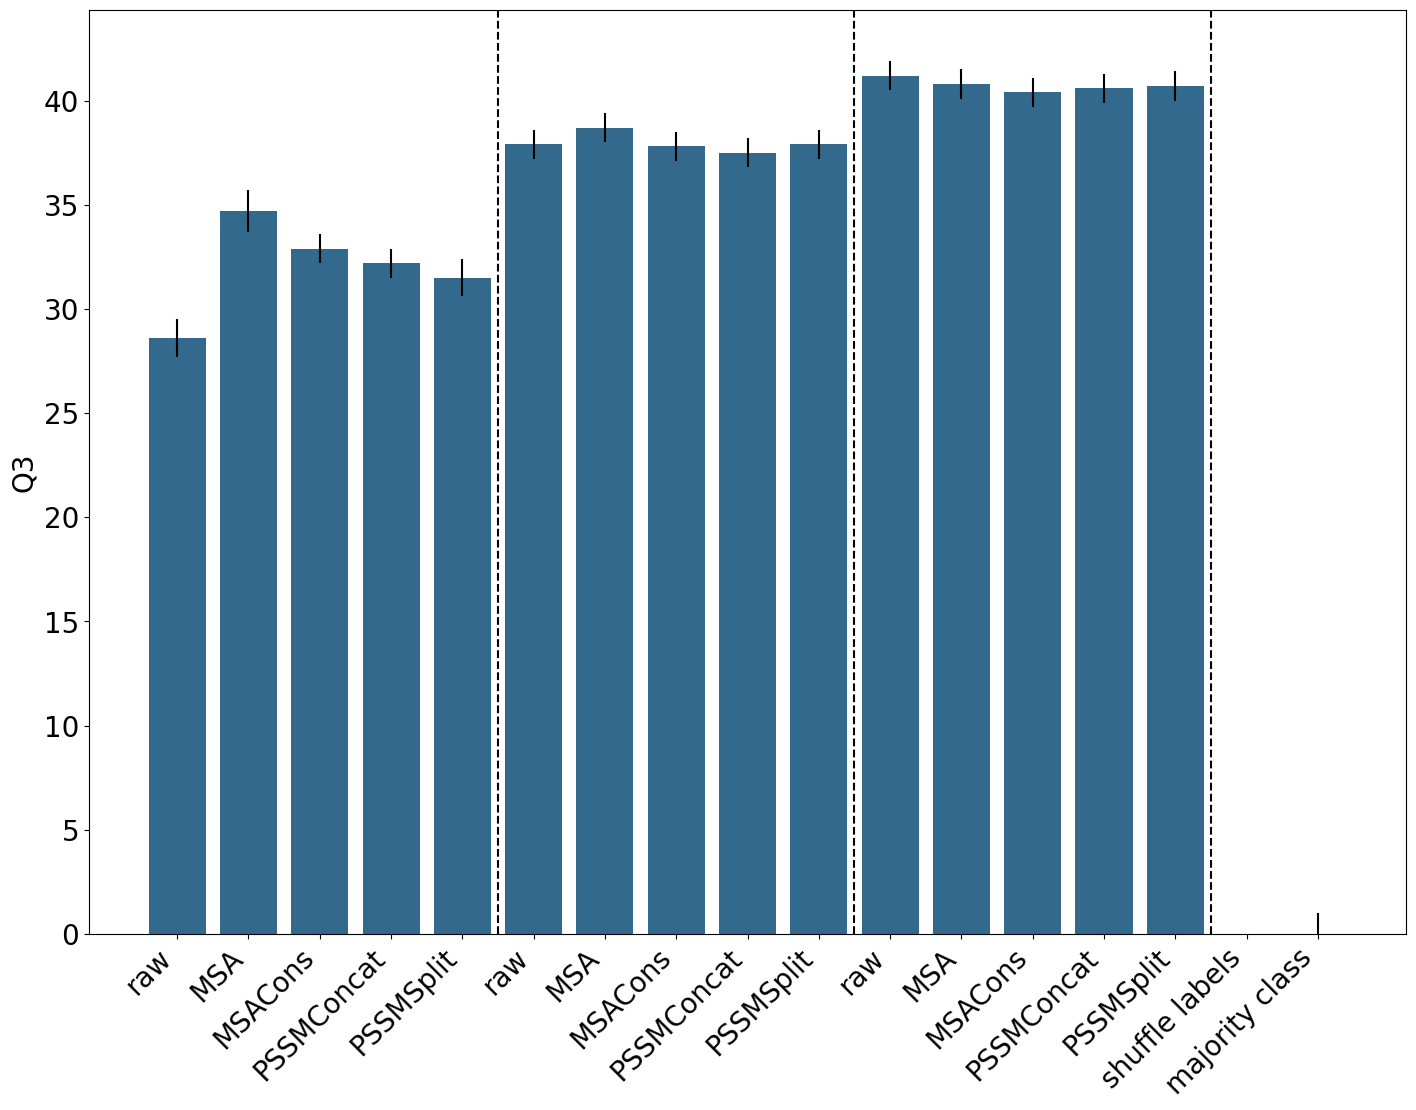

In [36]:
plt.rcParams['font.size'] = '20'
fig, ((ax)) = plt.subplots(1,1, figsize=(17,12))
x_pos = np.arange(len(labels))


ax.bar(labels, difference_to_random, yerr=ci, color="#32698c", width=0.8)
ax.set_ylim(bottom=0)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

# Plot Conservation from embeddings vs. Embeddings + Evolutionary Information (MSAConsensus)

In [37]:
df_models_msacons = pandas.read_csv('MSAcons_vs_embeddingOnly.csv', sep=";")
df_models_msacons

,Method,Embedding based,Performance Measure,Performance,CI/SE,CI,Prediction type,Testset,Publication
0,ConSeq,0,MCC,0.608,CI: 0.006,0.006,PR conservation,ConSurf10k,https://link.springer.com/article/10.1007/s004...
1,mmseqs2,0,MCC,0.418,CI: 0.009,0.009,PR conservation,ConSurf10k,own
2,VESPA,1,MCC,0.596,CI: 0.006,0.006,PR conservation,ConSurf10k,https://link.springer.com/article/10.1007/s004...
3,VESPA MSACons,2,MCC,0.320,CI: 0.01,0.010,PR conservation,ConSurf10k,https://link.springer.com/article/10.1007/s004...
4,shuffle labels,-1,MCC,0.000,CI: 0.006,0.006,PR conservation,ConSurf10k,own
5,bindPredictML17,0,F1-all,34.000,CI: 2,2.000,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
6,bindEmbed21DL,1,F1-all,47.000,CI: 2,2.000,PR ligand binding,TestSet225,https://www.biorxiv.org/content/10.1101/2021.0...
7,bindEmbed21DL MSACons,2,F1-all,50.000,CI: 2,2.000,PR ligand binding,TestSet225,own
8,shuffle labels,-1,F1-all,3.700,/,0.000,PR ligand binding,TestSet225,https://www.biorxiv.org/content/10.1101/2021.0...
9,ODiNPred,0,Spearman,0.670,CI: 0.01,0.010,PR disorder,CheZOD117,https://www.biorxiv.org/content/10.1101/2022.0...


In [38]:
df_models_msacons_sorted = df_models_msacons.sort_values(by=['Prediction type','Performance Measure', 'Embedding based','Performance', 'Method'])

msacons_pr_conservation_labels = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR conservation")]['Method']
msacons_pr_ligand_binding_labels = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains('PR ligand binding')]['Method']
msacons_pr_disorder_labels = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains('PR disorder')]['Method']
msacons_ps_helix_labels = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains('PS membrane helix')]['Method']
msacons_ps_sheet_labels = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains('PS membrane beta')]['Method']

conservation_performances = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR conservation")]['Performance']
ligand_binding_performances = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR ligand binding")]['Performance']
disorder_performances = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR disorder")]['Performance']
helix_performances = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane helix")]['Performance']
sheet_performances = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane beta")]['Performance']

conservation_ci = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR conservation")]['CI']
ligand_binding_ci = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR ligand binding")]['CI']
disorder_ci = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR disorder")]['CI']
helix_ci = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane helix")]['CI']
sheet_ci = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane beta")]['CI']

conservation_is_embedding_based = df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR conservation")]['Embedding based']
ligand_binding_is_embedding_based =  df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR ligand binding")]['Embedding based']
disorder_is_embedding_based =  df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PR disorder")]['Embedding based']
helix_is_embedding_based =  df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane helix")]['Embedding based']
sheet_is_embedding_based =  df_models_msacons_sorted[df_models_msacons_sorted['Prediction type'].str.contains("PS membrane beta")]['Embedding based']

In [39]:
sheet_performances

16     0.0
13    56.6
14    80.5
15    82.4
Name: Performance, dtype: float64

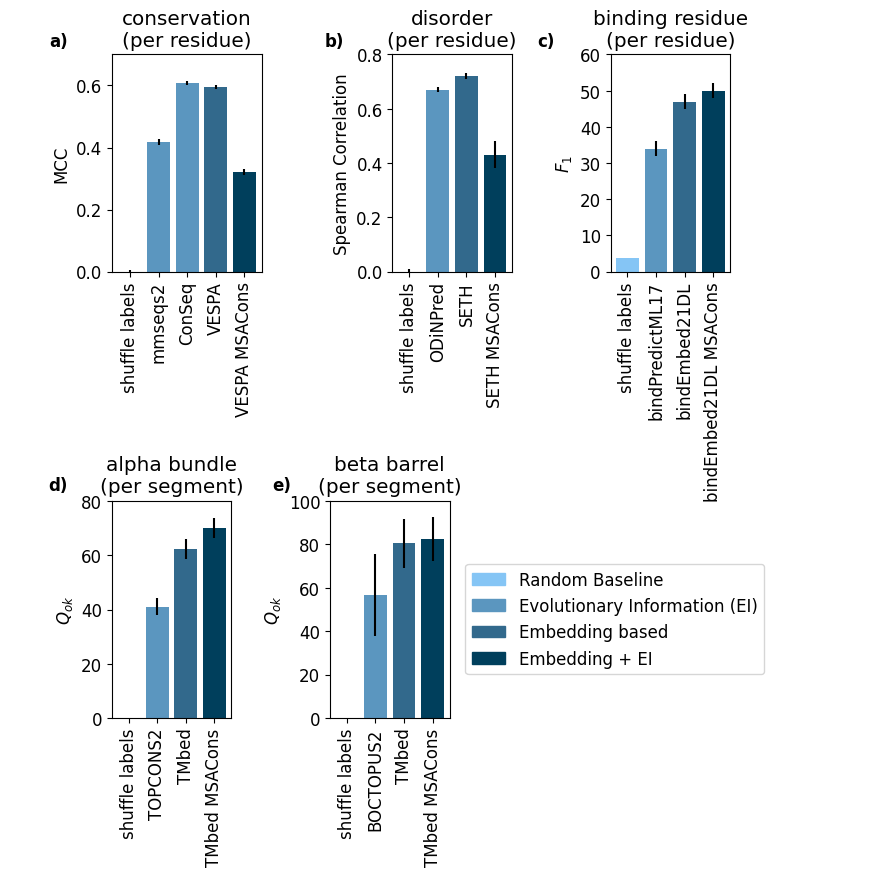

In [40]:
plt.rcParams['font.size'] = '12'
fig_all = plt.figure(figsize=(12, 12))

ax_conservation = plt.subplot2grid((25, 30), (0, 0), colspan=5, rowspan=6)
ax_conservation.bar(msacons_pr_conservation_labels, 
            [float(entry) for entry in conservation_performances],
            yerr=[float(entry) for entry in conservation_ci], 
            color=color_assignment(conservation_is_embedding_based), 
            width=0.8)
ax_conservation.set_xticks([0,1,2,3,4], labels=msacons_pr_conservation_labels, rotation=90)
ax_conservation.set_ylabel("MCC")
ax_conservation.set_ylim(top=0.7, bottom=0)
ax_conservation.set_title('conservation\n(per residue)')
ax_conservation.text(-0.11, 0.77, "a)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_disorder = plt.subplot2grid((25, 30), (0, 9), colspan=4, rowspan=6)
ax_disorder.bar(msacons_pr_disorder_labels, 
            disorder_performances, 
            yerr=[float(entry) for entry in disorder_ci],
            color=color_assignment(disorder_is_embedding_based), 
            width=0.8)
ax_disorder.set_xticks([0,1,2,3], labels=msacons_pr_disorder_labels, rotation=90)
ax_disorder.set_ylabel("Spearman Correlation")
ax_disorder.set_ylim(top=0.8, bottom=0)
ax_disorder.set_title('disorder\n(per residue)')
ax_disorder.text(0.1, 0.77, "b)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_binding_residue = plt.subplot2grid((25, 30), (0, 16), colspan=4, rowspan=6)
ax_binding_residue.bar(msacons_pr_ligand_binding_labels, 
            [float(entry) for entry in ligand_binding_performances], 
            yerr=[float(entry) for entry in ligand_binding_ci],
            color=color_assignment(ligand_binding_is_embedding_based), 
            width=0.8)
ax_binding_residue.set_xticks([0,1,2,3], labels=msacons_pr_ligand_binding_labels, rotation=90)
ax_binding_residue.set_ylabel("$F_{1}$")
ax_binding_residue.set_ylim(top=60)
ax_binding_residue.set_title('binding residue\n(per residue)')
ax_binding_residue.text(0.26, 0.77, "c)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_helix = plt.subplot2grid((25, 30), (12, 0), colspan=4, rowspan=6)
ax_helix.bar([0,1,2,3], 
            [float(entry) for entry in helix_performances], 
            yerr=[float(entry) for entry in helix_ci],
            color=color_assignment(helix_is_embedding_based), 
            width=0.8)
ax_helix.set_xticks([0,1,2,3], labels=msacons_ps_helix_labels, rotation=90)
ax_helix.set_ylabel("$Q_{ok}$")
ax_helix.set_ylim(top=80)
ax_helix.set_title('alpha bundle\n(per protein)')
ax_helix.text(-0.11, 0.29, "d)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_sheet = plt.subplot2grid((25, 30), (12, 7), colspan=4, rowspan=6)
ax_sheet.bar([0,1,2,3], 
            [float(entry) for entry in sheet_performances], 
            yerr=[float(entry) for entry in sheet_ci],
            color=color_assignment(sheet_is_embedding_based), 
            width=0.8)
ax_sheet.set_xticks([0,1,2,3], labels=msacons_ps_sheet_labels, rotation=90)
ax_sheet.set_ylabel("$Q_{ok}$")
ax_sheet.set_ylim(top=100)
ax_sheet.set_title('beta barrel\n(per protein)')
ax_sheet.text(0.06, 0.29, "e)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')


fig_all.legend(handles=[legend_Random, legend_EI, legend_EB, legend_EB_EI], loc=(0.52,0.23))

In [41]:
helix_performances

20     0.0
17    41.0
18    62.4
19    70.1
Name: Performance, dtype: float64

# Literature review: Evolutionary Information vs. Embeddings

In [42]:
df_models = pandas.read_csv('literature_reviev.csv', sep=";")
df_models

,Method,Embedding based,Performance Measure,Performance,CI/SE,CI,Prediction type,Testset,Publication
0,random pairs,-1,TM-score,0.17000,/,0.00000,PR CAMEO 3D,PDB,https://seq2fun.dcmb.med.umich.edu//TM-score/T...
1,AlphaFold2,0,TM-score,0.88000,/,0.00000,PR CAMEO 3D,CAMEO,https://www.science.org/doi/10.1126/science.ad...
2,ESMFold,1,TM-score,0.83000,/,0.00000,PR CAMEO 3D,CAMEO,https://www.science.org/doi/10.1126/science.ad...
3,random pairs,-1,TM-score,0.17000,/,0.00000,PR 3D,PDB,https://seq2fun.dcmb.med.umich.edu//TM-score/T...
4,AlphaFold2,0,TM-score,0.85000,/,0.00000,PR 3D,CASP14,https://www.science.org/doi/10.1126/science.ad...
5,ESMFold,1,TM-score,0.68000,/,0.00000,PR 3D,CASP14,https://www.science.org/doi/10.1126/science.ad...
6,shuffle labels,-1,MCC,0.00116,CI: 0.00008,0.00008,PR signal peptide,Signal-P5.0 benchmark set,own
7,SignalP-5.0,0,MCC,0.86300,/,0.00000,PR signal peptide,SignalP5.0 benchmark set,https://www.nature.com/articles/s41587-021-011...
8,SignalP-6.0,1,MCC,0.86800,/,0.00000,PR signal peptide,Signal-P5.0 benchmark set,https://www.nature.com/articles/s41587-021-011...
9,shuffle labels,-1,MCC,0.00003,CI: 0.00080,0.00080,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805


In [43]:
struct_2d_labels = df_models[df_models['Prediction type'].str.contains("PR secondary structure")]['Method']
struct_2d_performances = df_models[df_models['Prediction type'].str.contains("PR secondary structure")]['Performance']
struct_2d_ci = df_models[df_models['Prediction type'].str.contains("PR secondary structure")]['CI']
struct_2d_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PR secondary structure")]['Embedding based']

struct_3d_labels = df_models[df_models['Prediction type'].str.contains("PR 3D")]['Method']
struct_3d_performances = df_models[df_models['Prediction type'].str.contains("PR 3D")]['Performance']
struct_3d_ci = df_models[df_models['Prediction type'].str.contains("PR 3D")]['CI']
struct_3d_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PR 3D")]['Embedding based']

signal_pep_labels = df_models[df_models['Prediction type'].str.contains("PR signal peptide")]['Method']
signal_pep_performances = df_models[df_models['Prediction type'].str.contains("PR signal peptide")]['Performance']
signal_pep_ci = df_models[df_models['Prediction type'].str.contains("PR signal peptide")]['CI']
signal_pep_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PR signal peptide")]['Embedding based']

effect_labels = df_models[df_models['Prediction type'].str.contains("PR effect")]['Method']
effect_performances = df_models[df_models['Prediction type'].str.contains("PR effect")]['Performance']
effect_ci = df_models[df_models['Prediction type'].str.contains("PR effect")]['CI']
effect_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PR effect")]['Embedding based']

cath_labels = df_models[df_models['Prediction type'].str.contains("PP CATH")]['Method']
cath_performances = df_models[df_models['Prediction type'].str.contains("PP CATH")]['Performance']
cath_ci = df_models[df_models['Prediction type'].str.contains("PP CATH")]['CI']
cath_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PP CATH")]['Embedding based']

scop_labels = df_models[df_models['Prediction type'].str.contains("PP SCOP")]['Method']
scop_performances = df_models[df_models['Prediction type'].str.contains("PP SCOP")]['Performance']
scop_ci = df_models[df_models['Prediction type'].str.contains("PP SCOP")]['CI']
scop_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PP SCOP")]['Embedding based']

localization_labels = df_models[df_models['Prediction type'].str.contains("PP localization")]['Method']
localization_performances = df_models[df_models['Prediction type'].str.contains("PP localization")]['Performance']
localization_ci = df_models[df_models['Prediction type'].str.contains("PP localization")]['CI']
localization_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PP localization")]['Embedding based']

go_labels = df_models[df_models['Prediction type'].str.contains("PP GO Function")]['Method']
go_performances = df_models[df_models['Prediction type'].str.contains("PP GO Function")]['Performance']
go_ci = df_models[df_models['Prediction type'].str.contains("PP GO Function")]['CI']
go_is_embedding_based = df_models[df_models['Prediction type'].str.contains("PP GO Function")]['Embedding based']

C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1960682790.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2d.set_xticklabels(struct_2d_labels, rotation=90)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1960682790.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3d.set_xticklabels(struct_3d_labels, rotation=90)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1960682790.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_signal_pep.set_xticklabels(signal_pep_labels, rotation=90)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1960682790.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_effect.set_xticklabels(effect_labels, rotation=90)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_31724\1960682790.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_cath.set_xticklabels(cath_labels, rotation=90)
C:\

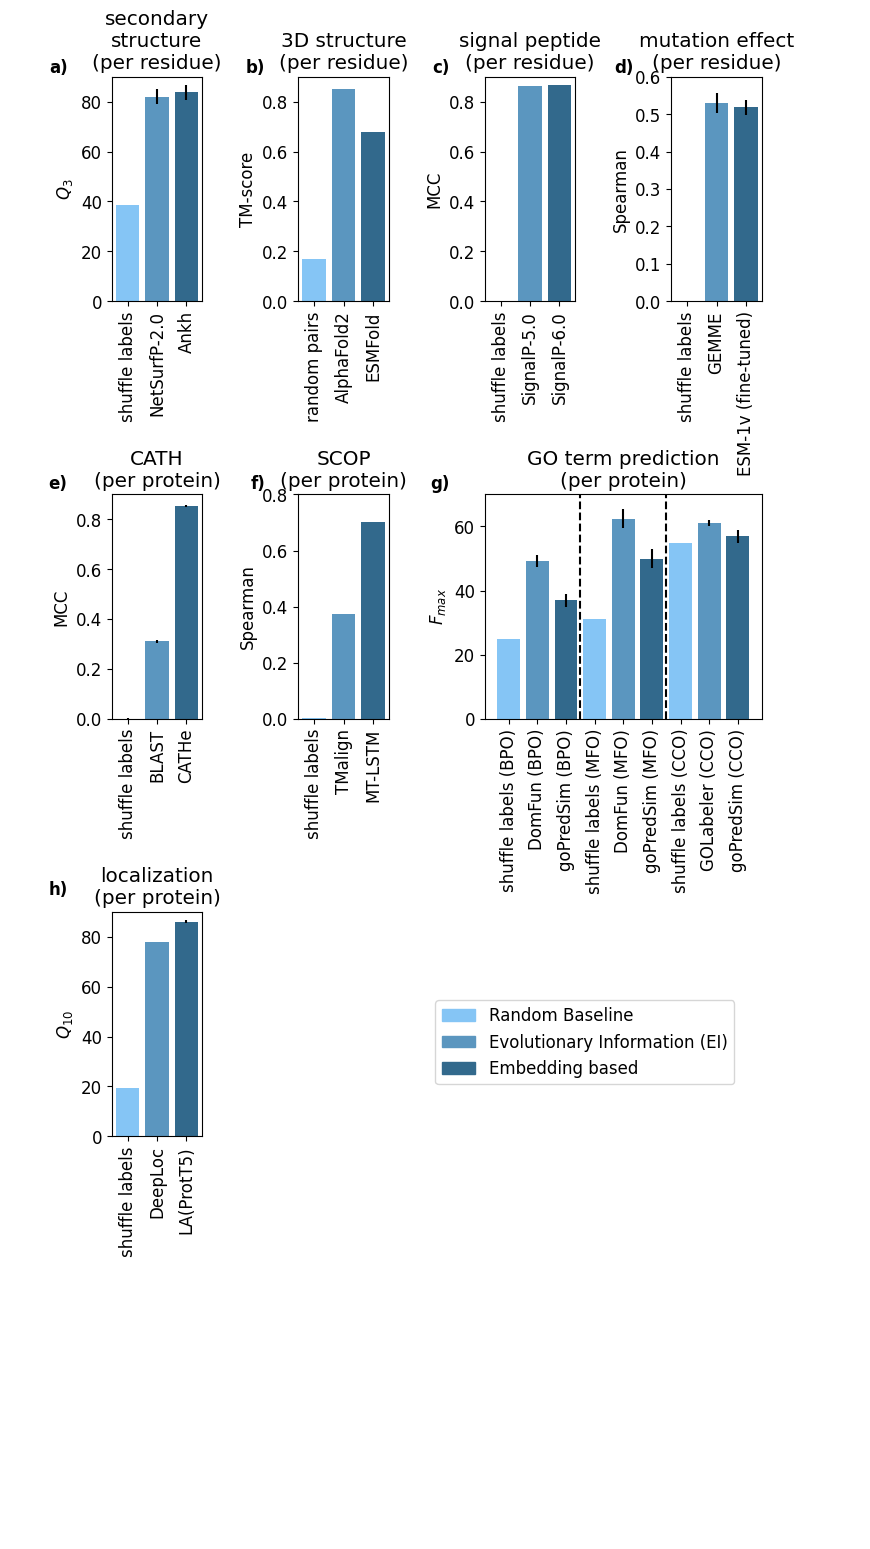

In [44]:
plt.rcParams['font.size'] = '12'
fig_review = plt.figure(figsize=(12, 24))

ax_2d = plt.subplot2grid((40, 60), (0, 0), colspan=6, rowspan=5)
ax_2d.bar(struct_2d_labels, 
          [float(entry) for entry in struct_2d_performances],
          yerr=[float(entry) for entry in struct_2d_ci], 
          color=color_assignment(struct_2d_is_embedding_based), 
          width=0.8)
ax_2d.set_xticklabels(struct_2d_labels, rotation=90)
ax_2d.set_ylabel("$Q_{3}$")
ax_2d.set_ylim(top=90, bottom=0)
ax_2d.set_title('secondary\nstructure\n(per residue)')
ax_2d.text(-0.11, 1.47, "a)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_3d = plt.subplot2grid((40, 60), (0, 12), colspan=6, rowspan=5)
ax_3d.bar(struct_3d_labels, 
          [float(entry) for entry in struct_3d_performances],
          yerr=[float(entry) for entry in struct_3d_ci], 
          color=color_assignment(struct_3d_is_embedding_based), 
          width=0.8)
ax_3d.set_xticklabels(struct_3d_labels, rotation=90)
ax_3d.set_ylabel("TM-score")
ax_3d.set_ylim(top=0.9, bottom=0)
ax_3d.set_title('3D structure\n(per residue)')
ax_3d.text(0.04, 1.47, "b)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_signal_pep = plt.subplot2grid((40, 60), (0, 24), colspan=6, rowspan=5)
ax_signal_pep.bar(signal_pep_labels, 
          [float(entry) for entry in signal_pep_performances],
          yerr=[float(entry) for entry in signal_pep_ci], 
          color=color_assignment(signal_pep_is_embedding_based), 
          width=0.8)
ax_signal_pep.set_xticklabels(signal_pep_labels, rotation=90)
ax_signal_pep.set_ylabel("MCC")
ax_signal_pep.set_ylim(top=0.9, bottom=0)
ax_signal_pep.set_title('signal peptide\n(per residue)')
ax_signal_pep.text(0.18, 1.47, "c)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_effect = plt.subplot2grid((40, 60), (0, 36), colspan=6, rowspan=5)
ax_effect.bar(effect_labels, 
          [float(entry) for entry in effect_performances],
          yerr=[float(entry) for entry in effect_ci], 
          color=color_assignment(effect_is_embedding_based), 
          width=0.8)
ax_effect.set_xticklabels(effect_labels, rotation=90)
ax_effect.set_ylabel("Spearman")
ax_effect.set_ylim(top=0.6, bottom=0)
ax_effect.set_title('mutation effect\n(per residue)')
ax_effect.text(0.32, 1.47, "d)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_cath = plt.subplot2grid((40, 60), (9, 0), colspan=6, rowspan=5)
ax_cath.bar(cath_labels, 
          [float(entry) for entry in cath_performances],
          yerr=[float(entry) for entry in cath_ci], 
          color=color_assignment(cath_is_embedding_based), 
          width=0.8)
ax_cath.set_xticklabels(cath_labels, rotation=90)
ax_cath.set_ylabel("MCC")
ax_cath.set_ylim(top=0.9, bottom=0)
ax_cath.set_title('CATH\n(per protein)')
ax_cath.text(-0.11, 1.02, "e)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_scop = plt.subplot2grid((40, 60), (9, 12), colspan=6, rowspan=5)
ax_scop.bar(scop_labels, 
          [float(entry) for entry in scop_performances],
          yerr=[float(entry) for entry in scop_ci], 
          color=color_assignment(scop_is_embedding_based), 
          width=0.8)
ax_scop.set_xticklabels(scop_labels, rotation=90)
ax_scop.set_ylabel("Spearman")
ax_scop.set_ylim(top=0.8, bottom=0)
ax_scop.set_title('SCOP\n(per protein)')
ax_scop.text(0.04, 1.02, "f)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_localization = plt.subplot2grid((40, 60), (18, 0), colspan=6, rowspan=5)
ax_localization.bar(localization_labels, 
          [float(entry) for entry in localization_performances],
          yerr=[float(entry) for entry in localization_ci], 
          color=color_assignment(localization_is_embedding_based), 
          width=0.8)
ax_localization.set_xticklabels(localization_labels, rotation=90)
ax_localization.set_ylabel("$Q_{10}$")
ax_localization.set_ylim(top=90, bottom=0)
ax_localization.set_title('localization\n(per protein)')
ax_localization.text(-0.11, 0.58, "h)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

ax_go = plt.subplot2grid((40, 60), (9, 24), colspan=18, rowspan=5)
ax_go.bar(go_labels, 
          [float(entry) for entry in go_performances],
          yerr=[float(entry) for entry in go_ci], 
          color=color_assignment(go_is_embedding_based), 
          width=0.8)
ax_go.set_xticklabels(go_labels, rotation=90)
ax_go.set_ylabel("$F_{max}$")
ax_go.set_ylim(top=70, bottom=0)
ax_go.set_title('GO term prediction\n(per protein)')
ax_go.axvline(x=[2.5],  color='black', ls='--')
ax_go.axvline(x=[5.5],  color='black', ls='--')
ax_go.annotate('BPO',xy=(-0.7, 90), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax_go.annotate('MFO',xy=(2.6, 90), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax_go.annotate('CCO',xy=(5.6, 90), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax_go.text(0.18, 1.02, "g)", transform=ax.transAxes, va='top', ha='right', fontweight='bold')

fig_review.legend(handles=[legend_Random, legend_EI, legend_EB], loc=(0.5,0.3))

# SOM - Conservation from MMseqs

In [45]:
df_mmseqs_conservation = pandas.read_csv('mmseqs_conservation.csv', sep=";")
df_mmseqs_conservation

,Threshold,MCC,CI (MCC),Q2,CI (Q2)
0,0.0,NaN,NaN,49.2,0.4
1,0.1,0.053,0.009,49.2,0.4
2,0.2,0.249,0.007,57.5,0.4
3,0.3,0.384,0.009,68.4,0.5
4,0.4,0.418,0.009,70.3,0.5
5,0.5,0.402,0.009,66.8,0.5
6,0.6,0.370,0.009,61.9,0.6
7,0.7,0.325,0.008,56.8,0.6
8,0.8,0.268,0.008,51.8,0.5
9,0.9,0.192,0.007,46.6,0.4


Text(0.335, 85, '$Q_{2}$=70.3')

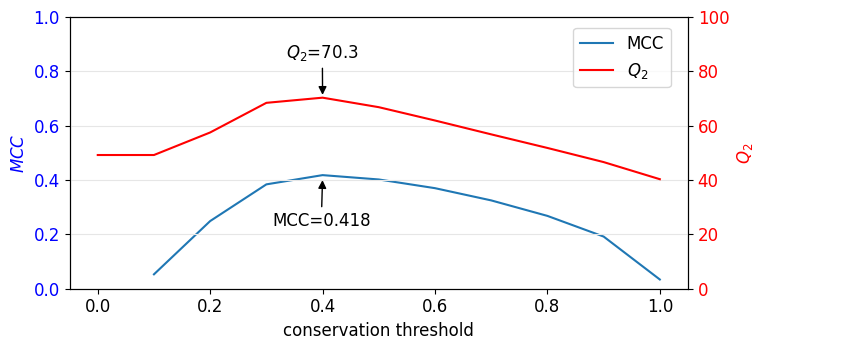

In [46]:
plt.rcParams['font.size'] = '12'
fig_cons = plt.figure(figsize=(12, 12))

ax_mmseqs_mcc = plt.subplot2grid((20, 30), (0, 0), colspan=20, rowspan=6)
ax_mmseqs_Q2 = ax_mmseqs_mcc.twinx()

ln_mcc = ax_mmseqs_mcc.plot(df_mmseqs_conservation['Threshold'], df_mmseqs_conservation['MCC'], label="MCC")
ln_q2 = ax_mmseqs_Q2.plot(df_mmseqs_conservation['Threshold'], df_mmseqs_conservation['Q2'], color='red', label="$Q_{2}$")

ax_mmseqs_mcc.set_ylim(top=1, bottom=0)
ax_mmseqs_Q2.set_ylim(top=100, bottom=0)
plt.grid(axis='y', color='0.9')
fig_cons.legend(loc=(0.68,0.75))

ax_mmseqs_mcc.tick_params(axis='y', labelcolor='blue')
ax_mmseqs_Q2.tick_params(axis='y', labelcolor='red')
ax_mmseqs_mcc.set_ylabel("$MCC$", color='blue')
ax_mmseqs_Q2.set_ylabel("$Q_{2}$", color='red')
ax_mmseqs_mcc.set_xlabel('conservation threshold')

ax_mmseqs_mcc.annotate('MCC=0.418', xy=(0.4, 0.41), textcoords='data', xytext=(0.31,0.23), arrowprops={'arrowstyle': '-|>', 'color': 'black'}) 
ax_mmseqs_Q2.annotate('$Q_{2}$=70.3', xy=(0.4, 70.3), textcoords='data', xytext=(0.335,85), arrowprops={'arrowstyle': '-|>', 'color': 'black'}) 
